# 0.1 imports

In [132]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


from sklearn.metrics import mean_squared_error, mean_absolute_error

# 0.2 helpers functions

In [133]:
# def plot_gdp(dataframe, countrys, print_legend=True):
    
#     countrys_with_year = countrys + ['year']
#     df=dataframe[countrys_with_year].copy()
#     # Create a list of colors
#     color_discrete_sequence = [
#         'navy', 'orange', 'tomato', 'crimson', 'darkgreen', 'brown',
#         'forestgreen', 'steelblue',
#     ]

#     # Create a list of traces
#     traces = []
#     for j, seleccion in enumerate(countrys):
#         trace = go.Scatter(
#             x=df['year'],
#             y=df[seleccion],
#             mode='lines+markers',
#             name=seleccion,
#             marker=dict(color=color_discrete_sequence[j % len(color_discrete_sequence)]),
#         )
#         traces.append(trace)

#     # Create the figure
#     fig = go.Figure(traces)

#     # Configure the layout
#     fig.update_layout(
#         title='GDP',
#         title_font_size=30,
#         plot_bgcolor='#F7FAFC',
#         xaxis=dict(tickangle=30),
#         yaxis=dict(tickformat=',.0f'),
#         xaxis_dtick='2',
#         xaxis_title='Year',
#         yaxis_title='Real GDP growth (Annual percent change)',
#         legend_title_text='Legend',
#         legend=dict(x=0, y=1) if print_legend == True else {},
#         showlegend=True if print_legend == True else False,
#         margin=dict(l=0, r=0, t=50, b=0),
#         template='plotly',
#         height=800,
#         width=1200,
#     )

#     return fig


In [134]:
def plot_gdp(dataframe, countrys, print_legend=True):
    countrys_with_year = countrys + ['year']
    df = dataframe[countrys_with_year].copy()

    color_palette = [
        'navy', 'orange', 'tomato', 'crimson', 'darkgreen', 'brown',
        'forestgreen', 'steelblue',
    ]
    
    plt.figure(figsize=(12, 8))

    for seleccion in countrys:
        sns.lineplot(x='year', y=seleccion, data=df, label=seleccion)#, color=color_palette[j % len(color_palette)])

    plt.title('GDP', fontsize=20)
    plt.xlabel('Year')
    plt.ylabel('Real GDP growth (Annual percent change)')
    plt.xticks(rotation=30)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))
    
    if print_legend:
        plt.legend(title='Legend', loc='upper left')
    else:
        plt.legend().set_visible(False)
    
    plt.tight_layout()
    plt.grid()
    plt.show()

In [135]:

def fill_individual_countries(dataframe, countries):
    
    df = dataframe[countries+['year']].copy()

    check_na = df.isna().sum()
    null_values = list(check_na[check_na>0].index)

    complete_group = list(check_na[check_na==0].index)
    complete_group.remove('year')
    # complete_group.remove('Sub-Saharan Africa (Region) ')

    df_complete_group = dataframe[complete_group]

    df_aux = pd.DataFrame()

    df_aux["year"] = dataframe["year"]
    df_aux["year_average"] = df_complete_group.mean(axis=1)


    for country in null_values:

        df_aux[country] = dataframe[country]

        aux = df_aux[~df_aux[country].isna()]

        aux['test'] = (aux[country] > aux['year_average']).astype(int)


        most_common = aux['test'].value_counts().idxmax()

        if most_common == 0:
            df_aux.loc[df_aux[country].isna(), country] = df_aux.loc[df_aux[country].isna(), "year_average"] - df_aux[country].std()
        else:
            df_aux.loc[df_aux[country].isna(), country] = df_aux.loc[df_aux[country].isna(), "year_average"] + df_aux[country].std()

    return df_aux

In [136]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [137]:

def metrics(y_true, y_pred,model_name):
    y_true = y_true.values
    y_pred = y_pred.values
    mae = round(mean_absolute_error(y_true, y_pred),0)
    rmse = round(np.sqrt(mean_squared_error(y_true, y_pred)),0)
    mape = round(mean_absolute_percentage_error(y_true, y_pred),0)
    metrics = pd.DataFrame({'Model': model_name,'mae': mae, 'rmse': rmse, 'mape': mape}, index=[0])
    return metrics



# 0.3 load data

In [138]:
path = '/home/lavino/Documentos/projetos_indicium/ds_desafio/'

In [139]:
df_raw = pd.read_csv(path + 'data/df_fill.csv', index_col='year', parse_dates=True)

In [140]:
df_raw.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
year,,,,,,,,,,,,,,,,,,,,,
1980-01-01,4.206173,2.7,-5.4,-1.732417,2.4,8.2,0.7,2.776923,8.187232,2.9,...,-0.8,3.3,3.487831,1.8,6.4,0.9,-1.9,3.8,1.917685,2.1
1981-01-01,7.200000,5.7,3.0,-3.196477,-4.4,3.8,-5.7,1.478698,7.687026,4.1,...,-0.5,1.9,0.914286,0.1,0.9,2.0,-0.2,4.2,1.732500,1.9
1982-01-01,5.116667,2.9,6.4,-2.925252,0.0,-0.1,-3.1,0.180473,6.675762,0.1,...,1.4,1.5,1.242857,0.6,-0.5,-0.1,0.4,2.2,1.950000,0.7
1983-01-01,4.283333,1.1,5.4,-2.284511,4.2,5.4,3.7,-1.117751,8.090579,-0.5,...,4.6,1.8,1.607143,1.7,-2.8,3.3,0.7,4.0,1.272500,2.6
1984-01-01,6.166667,2.0,5.6,-1.317845,6.0,10.2,2.0,-2.415976,10.046980,6.3,...,4.1,4.1,2.621429,2.5,3.9,5.0,0.3,6.6,2.080000,4.6


In [141]:
df_raw = df_raw.asfreq(freq='AS')

# 1.0 Season decomposition - additive model

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

## 1.1 plot

/tmp/ipykernel_8091/4018768895.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95]);


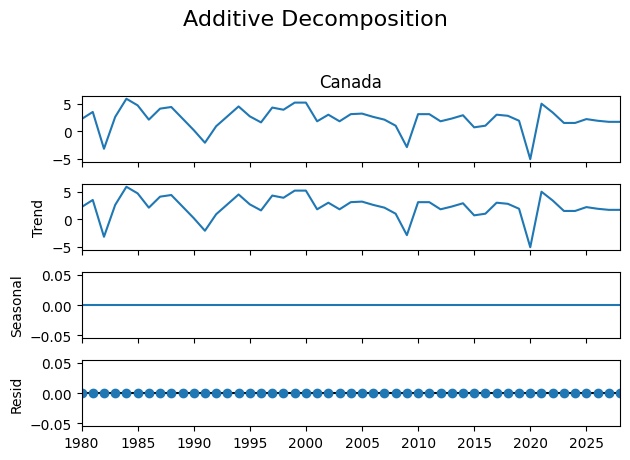

In [143]:
decomposition = seasonal_decompose(df_raw['Canada'], model='additive', period=1)

decomposition.plot().suptitle('Additive Decomposition', fontsize=16);
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

## 1.2 adf test

In [144]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Suponha que 'data' seja o seu DataFrame com os dados da série temporal
# data = pd.read_csv('seu_arquivo.csv', index_col='year')  # Certifique-se de adaptar para o seu arquivo de dados

# Selecionando uma série específica para teste (por exemplo, Argentina)
argentina_data = df_raw[['Argentina']]

# Realizando o teste ADF
result = adfuller(argentina_data)

# Interpretando os resultados do teste
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("A série é estacionária.")
else:
    print("A série não é estacionária.")


ADF Statistic: -5.637672770783478
p-value: 1.0539383150884774e-06
Critical Values: {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
A série é estacionária.


# 2.0 Models

In [145]:
df1 = df_raw.copy()

## 2.1 test train split

In [146]:
test_years = 5
train = df1[:-test_years]
test = df1[-test_years:]

## 2.2 exponencial smoothing

In [147]:
# exponential smoting
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [149]:
model_hot_winter = ExponentialSmoothing(
    train['Argentina'],
    trend='add',
    seasonal='add',
    seasonal_periods=12,
).fit()

In [150]:
pred_hot_winter = model_hot_winter.forecast(test.shape[0])

<Axes: xlabel='year'>

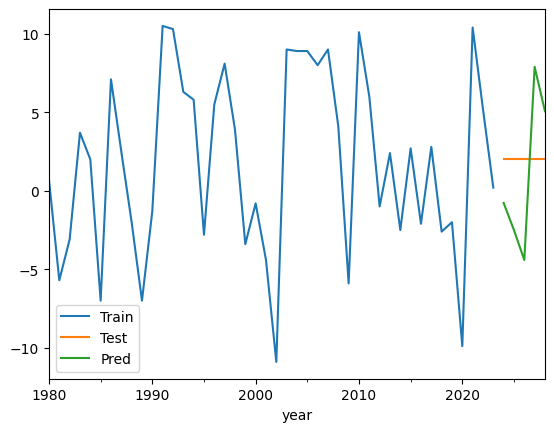

In [151]:
train['Argentina'].plot(legend=True, label='Train')
test['Argentina'].plot(legend=True, label='Test')
pred_hot_winter.plot(legend=True, label='Pred')

In [152]:
metrics(test['Argentina'], pred_hot_winter, 'Holt-Winters')

,Model,mae,rmse,mape
0,Holt-Winters,5.0,5.0,226.0


## 2.2 Simple exponential smoothing

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [153]:
# simple exponetial smooting
model_ses = SimpleExpSmoothing(
    train['Argentina'],
    initialization_method='heuristic',                              
).fit(smoothing_level=0.2, optimized=False)

pred_ses = model_ses.forecast(test.shape[0])

<Axes: xlabel='year'>

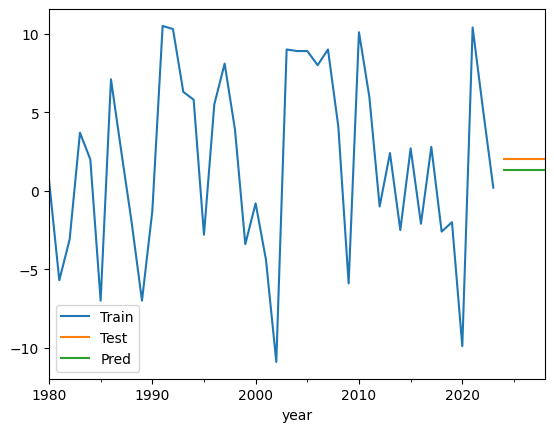

In [178]:
train['Argentina'].plot(legend=True, label='Train')
test['Argentina'].plot(legend=True, label='Test')
# pred_hot_winter.plot(legend=True, label='Pred')
pred_ses.plot(legend=True, label='Pred')

In [155]:
metrics_ses = metrics(test['Argentina'], pred_ses, 'Simple Exponential Smoothing')
metrics_ses

,Model,mae,rmse,mape
0,Simple Exponential Smoothing,1.0,1.0,35.0


## 2.3 Sarimax

In [156]:
from pmdarima.arima import auto_arima

In [157]:
model_sarimax = auto_arima(
    train['Argentina'],
    m=12,
    seasonal=False,
    stepwise=False
)

/home/lavino/Documentos/projetos_indicium/ds_desafio/venv/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


In [158]:
pred_sarimax = model_sarimax.predict(test.shape[0])
pred_sarimax

2024-01-01   -0.071107
2025-01-01    0.000000
2026-01-01    0.000000
2027-01-01    0.000000
2028-01-01    0.000000
Freq: AS-JAN, dtype: float64

<Axes: xlabel='year'>

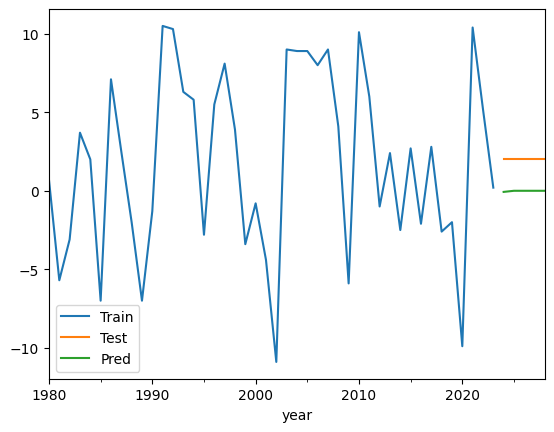

In [159]:
train['Argentina'].plot(legend=True, label='Train')
test['Argentina'].plot(legend=True, label='Test')
pred_sarimax.plot(legend=True, label='Pred')

In [160]:
metrics_sarimax = metrics(test['Argentina'], pred_sarimax, 'sarimax')
metrics_sarimax

,Model,mae,rmse,mape
0,sarimax,2.0,2.0,101.0


## 2.4 Prophet

17:44:27 - cmdstanpy - INFO - Chain [1] start processing
17:44:27 - cmdstanpy - INFO - Chain [1] done processing


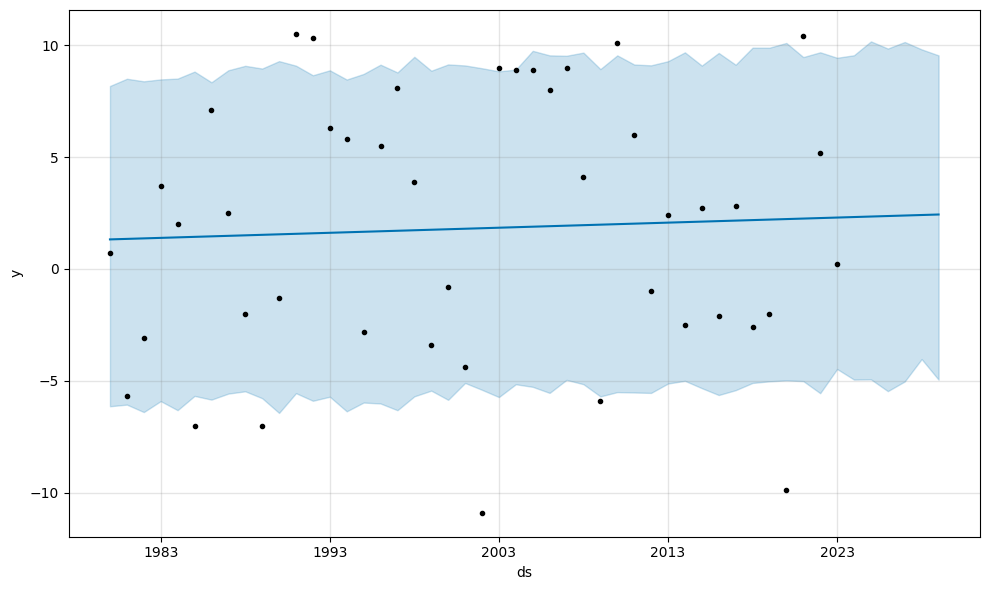

In [214]:
aux = train[['Argentina']].copy()
aux['ds'] = aux.index
aux.rename(columns={'Argentina': 'y'}, inplace=True)
aux

# # Crie e ajuste o modelo
model_prophet = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.1,
    seasonality_prior_scale=0,
)
model_prophet.fit(aux)


future = model_prophet.make_future_dataframe(periods=6, freq='YS')  
forecast = model_prophet.predict(future)


model_prophet.plot(forecast);

<Axes: xlabel='year'>

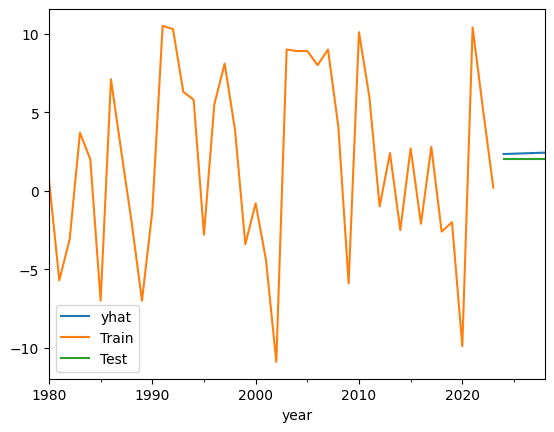

In [213]:
aux = forecast[['yhat']][-5:]
aux.index = test.index

aux.plot(legend=True, label='prophet');
train['Argentina'].plot(legend=True, label='Train')
test['Argentina'].plot(legend=True, label='Test')

In [209]:
metrics_prophet = metrics(test['Argentina'], aux['yhat'], 'prophet')
metrics_prophet

,Model,mae,rmse,mape
0,prophet,0.0,0.0,19.0
